In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# 2 sample test for the Difference in Means, Unequal Variances

Note:  you will not have to do these calculations by hand.  But in general, this is what you would run for all 2 sample tests: the Welch's t-test.  

Exmaple:  Arsenic concentration in public drinking water supplies is a potential health risk. A water-treatment wroker tests the drinking water arsenic concentrations in parts per billion (ppb) for 10 urban communities and 10 rural communities in Ontario.  The data is provided.  Find out if there is any differnece in mean arsenic concentrations between urban and rural community drinking water.  

In [2]:
Urban=pd.Series([3,7,25,10,15,6,12,25,15,7])
Rural=pd.Series([48,44,40,38,33,21,20,12,1,18])

[Text(0, 0.5, 'Arsenic ppb in Drinking Water')]

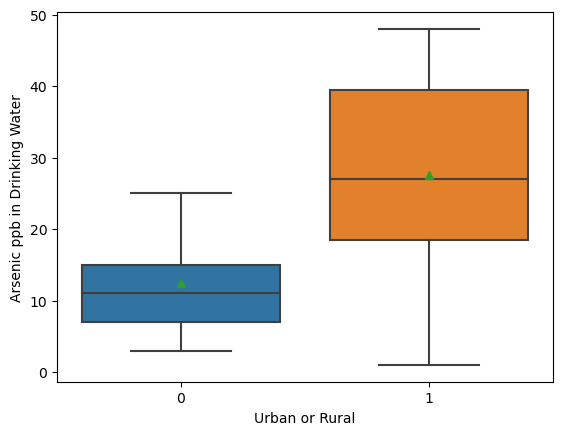

In [4]:
# Plot the data to visualize
ax=sns.boxplot(data=[Urban,Rural],showmeans=True)
ax.set(xlabel="Urban or Rural")
ax.set(ylabel="Arsenic ppb in Drinking Water")
#ax=sns.swarmplot(data=[Urban,Rural])

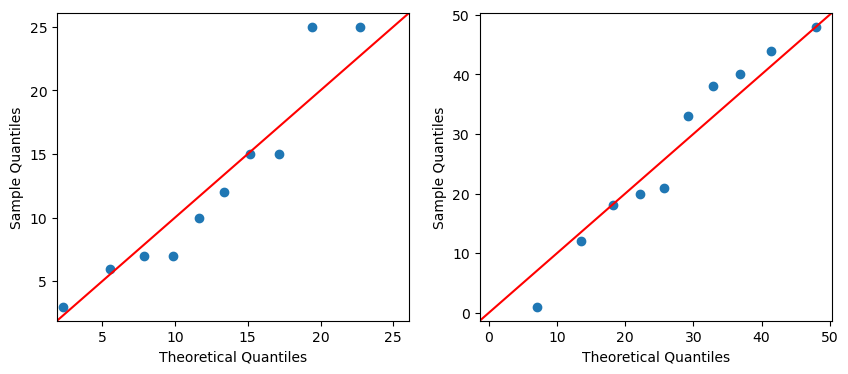

In [5]:
# Check normality
Urban.sort_values()
Rural.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(Urban,line='45',loc=np.mean(Urban),scale=np.std(Urban,ddof=1),ax=ax2[0])
sm.qqplot(Rural,line='45',loc=np.mean(Rural),scale=np.std(Rural,ddof=1),ax=ax2[1])
plt.show()

In [6]:
stats.shapiro(Urban)

ShapiroResult(statistic=0.8936103582382202, pvalue=0.18614870309829712)

In [7]:
stats.shapiro(Rural)

ShapiroResult(statistic=0.9506649374961853, pvalue=0.6763722896575928)

In [8]:
# Check for equal variance 
stats.levene(Urban,Rural,center='median')

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

Here the Levene's test states that we reject the null hypothesis that the Varinaces are equal for the two samples, so we accept the alternative hypothesis that they are different. So we need to use the t-test for independent samples to test for a difference beween means with samples with unequal variances. 

Parameter of interest:  the ppulation means for the two areas in Ontario, urban versus rural \
The hypothesis:  H0:  $\mu1-\mu2=0$; or H0: $\mu1=\mu2$ \
                 HA: $\mu1 \neq \mu2$ \
The test statistic:  Calculate test statistic for t-test with inequal variances
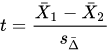 where 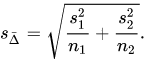 \
The dof = 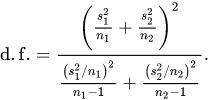, where you round round to the nearest interger to find the degrees of freedom.  Here dof=13.2 ~ 13. \
The critical value of t at df=13 and alpha=0.05 is 

In [9]:
stats.ttest_ind(Urban,Rural,equal_var=False)

Ttest_indResult(statistic=-2.7669395785560553, pvalue=0.0158272848161009)

In [10]:
# critical value of t at df=13 and alpha = 0.05 for a two-sided test.
stats.t.ppf(0.975,13)

2.1603686564610127

Since the absoulte value of the test statistic is as extreme or more extreme than the critical t value, we know it is a significnat result.

From the t-table we know that the p-value for a test statistic with 13 dof of 2.767 is between 0.01 and 0.005, which doubling is between 0.02 and 0.01.  Our exact p-value was found to be 0.016, so we reject the null hypotheiss and accept the alternative hypothesis that the mean arsenic cocentration in drinking water in Urban Ontario is different than the mean arsenic concentration in drinking water in rural Ontario.

equation for the 95% CI unequal variances \

Mean observed difference = 12.5-17.5 = -15 ppb

In [11]:
np.mean(Urban) - np.mean(Rural)

-15.0

In [12]:
# The 95% CI; note that it does not include 0.
cm=sm.stats.CompareMeans(sm.stats.DescrStatsW(Urban),sm.stats.DescrStatsW(Rural))
print(cm.tconfint_diff(usevar='unequal'))

(-26.694067105436396, -3.3059328945636057)
